# Heart Disease Prediction using Decision Tree and Random Forest

# Project: Final Project - Decision Tree
Dataset: UCI Heart Disease (Cleveland) Dataset
Author: [Virakden - Hikaru - Hermon]
Description:
- This project implements a Decision Tree classifier to predict the
- presence of heart disease using the classic UCI Cleveland dataset.
- The workflow includes data loading, cleaning, exploratory analysis,
- model training, evaluation, visualization, and comparison with Random Forest.
- Extra tasks: try different split criteria and discuss feature importances.

# 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from collections import Counter

# 2. Import Dataset

In [2]:
# !pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 

In [3]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 

df = heart_disease.data.original

In [4]:
heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [5]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [6]:
print("Total data points",df.shape[0])
print("Total number of features(as number of columns) are ", 
df.shape[1])
df.describe()

Total data points 303
Total number of features(as number of columns) are  14


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


# 3. Data Preprocessing

In [7]:
#drop mising data
df = df.dropna(subset=['ca', 'thal'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


In [8]:
# count number of each taget
df['num'].value_counts()

num
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

In [9]:
# binarize the target column (0: No disease, 1: Disease)
df.loc[:, 'num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df['num'].value_counts()

num
0    160
1    137
Name: count, dtype: int64

## Visualize Data

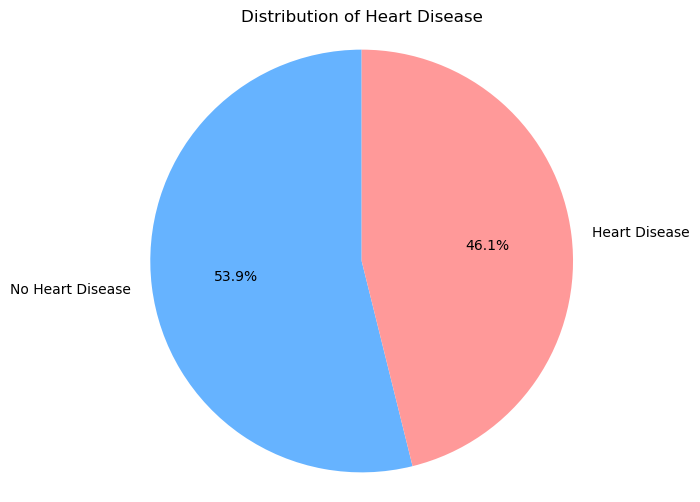

In [10]:
# Count 0s and 1s in the target column
target_counts = df['num'].value_counts().sort_index()  # Ensure 0 comes before 1
labels = ['No Heart Disease', 'Heart Disease']

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribution of Heart Disease')
plt.axis('equal')  # Ensures pie is a circle
plt.show()

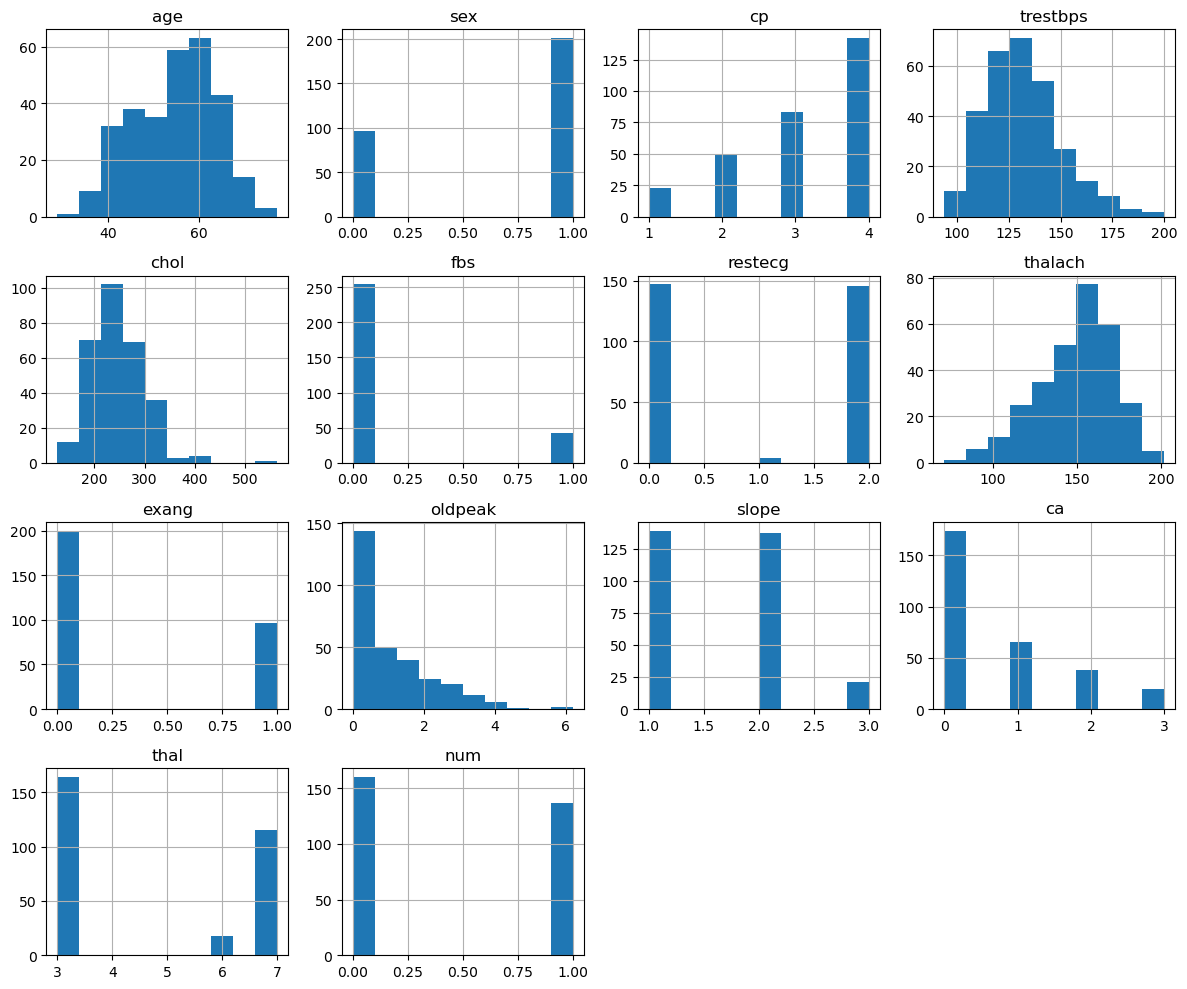

In [11]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

## Feature Preparation & Train-Test Split

In [12]:
random_state=42

In [13]:
# Separate features and target, split data
X = df.drop("num", axis=1)
y = df["num"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state)


# 4. Decision Tree Model Training & Evaluation

## Function and Parameter

In [14]:
max_depth=None
# random_state=42
viz_pathname = "viz/"
depth_str = str(max_depth) if max_depth is not None else "none"

In [15]:
# evaluation function
model_performance = {}

def evaluate(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    
    train_acc = model.score(X_train, y_train)
    test_acc = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    model_performance[model_name] = {
        'train_accuracy': train_acc,
        'test_accuracy': test_acc,
        'classification_report': class_report
    }
    
    print(f"Model: {model_name}")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

In [16]:
feature_names = X.columns
model_tree = {}
def tree_summary(model, model_name):
    tree = model.tree_


    importances=model.feature_importances_

    max_index = np.argmax(importances)
    most_important_feature = feature_names[max_index]

    # Get feature indices used at each node (=-2 means it's a leaf node)
    used_feature_indices = tree.feature
    used_features = used_feature_indices[used_feature_indices >= 0]

    # Get unique feature indices and count
    unique_used_indices = set(used_features)
    num_used_features = len(unique_used_indices)

    # Optionally get names of used features
    used_feature_names = X.columns[list(unique_used_indices)]

    # Summary metrics
    summary = {
        "Max Depth": tree.max_depth,
        "Total Nodes": tree.node_count,
        "Number of Leaf Nodes": sum(tree.children_left == -1),
        "Importance Feature": most_important_feature,
        "Number of features used": num_used_features,
        "Features used": used_feature_names,
    }
    model_tree[model_name] = summary
    print("\n=== Decision Tree Summary ===")
    for key, value in summary.items():
        if isinstance(value, list):
            print(f"{key}:")
            for item in value:
                print(f"  - {item}")
        else:
            print(f"{key}: {value}")

In [17]:
def visualizeModel(model, folder): 
    dot_data = export_graphviz(
        model,
        out_file=None,
        feature_names=X.columns,
        class_names=['No Disease', 'Disease'],  # adjust based on your labels
        filled=True,
        rounded=True,
        special_characters=True
    )
    
    graph = graphviz.Source(dot_data, format="png")
    graph.render(viz_pathname + folder, format="png", cleanup=False)
    return graph

## Model with Gini Index Criterion

1.0
Model: Gini Index
Train Accuracy: 1.0000
Test Accuracy: 0.7833
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.75      0.81        36
           1       0.69      0.83      0.75        24

    accuracy                           0.78        60
   macro avg       0.78      0.79      0.78        60
weighted avg       0.80      0.78      0.79        60

------------------------------------------------------------

=== Decision Tree Summary ===
Max Depth: 10
Total Nodes: 91
Number of Leaf Nodes: 46
Importance Feature: ca
Number of features used: 11
Features used: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak',
       'slope', 'ca', 'thal'],
      dtype='object')


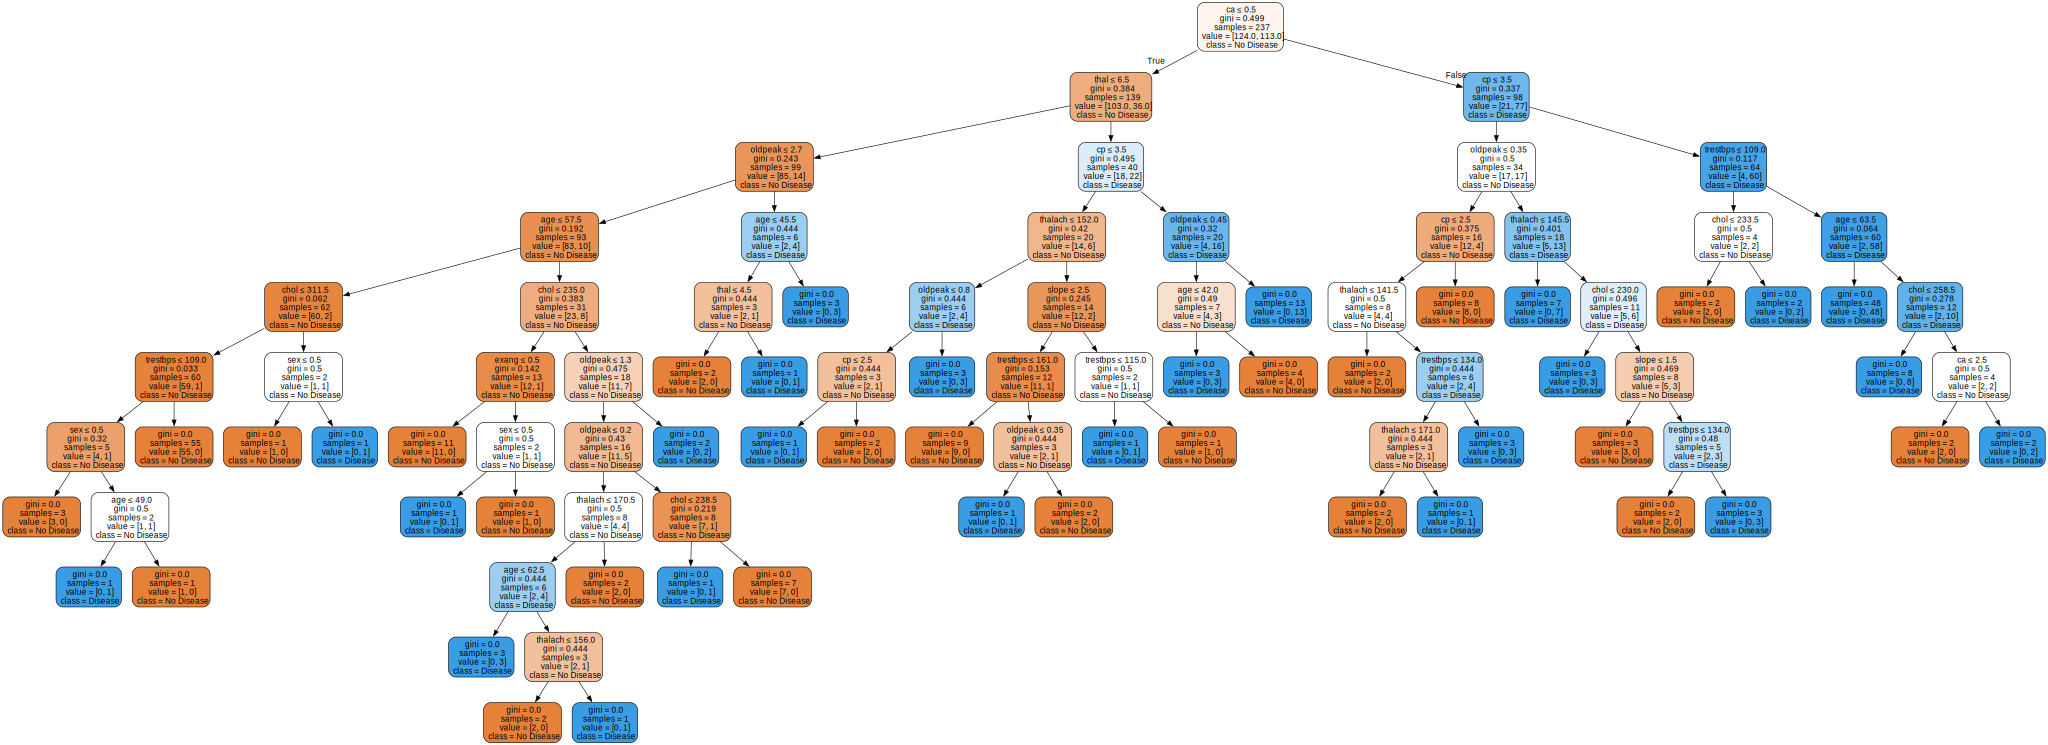

In [18]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=random_state)
dt_gini.fit(X_train, y_train)

print(dt_gini.score(X_train, y_train))

evaluate(dt_gini, "Gini Index", X_test, y_test)

tree_summary(dt_gini, "dt_gini")

visualizeModel(dt_gini, "dt_gini")


## Model with Information Gain Criterion

1.0
Model: Information Gain
Train Accuracy: 1.0000
Test Accuracy: 0.7833
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        36
           1       0.70      0.79      0.75        24

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60

------------------------------------------------------------

=== Decision Tree Summary ===
Max Depth: 11
Total Nodes: 83
Number of Leaf Nodes: 42
Importance Feature: ca
Number of features used: 12
Features used: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


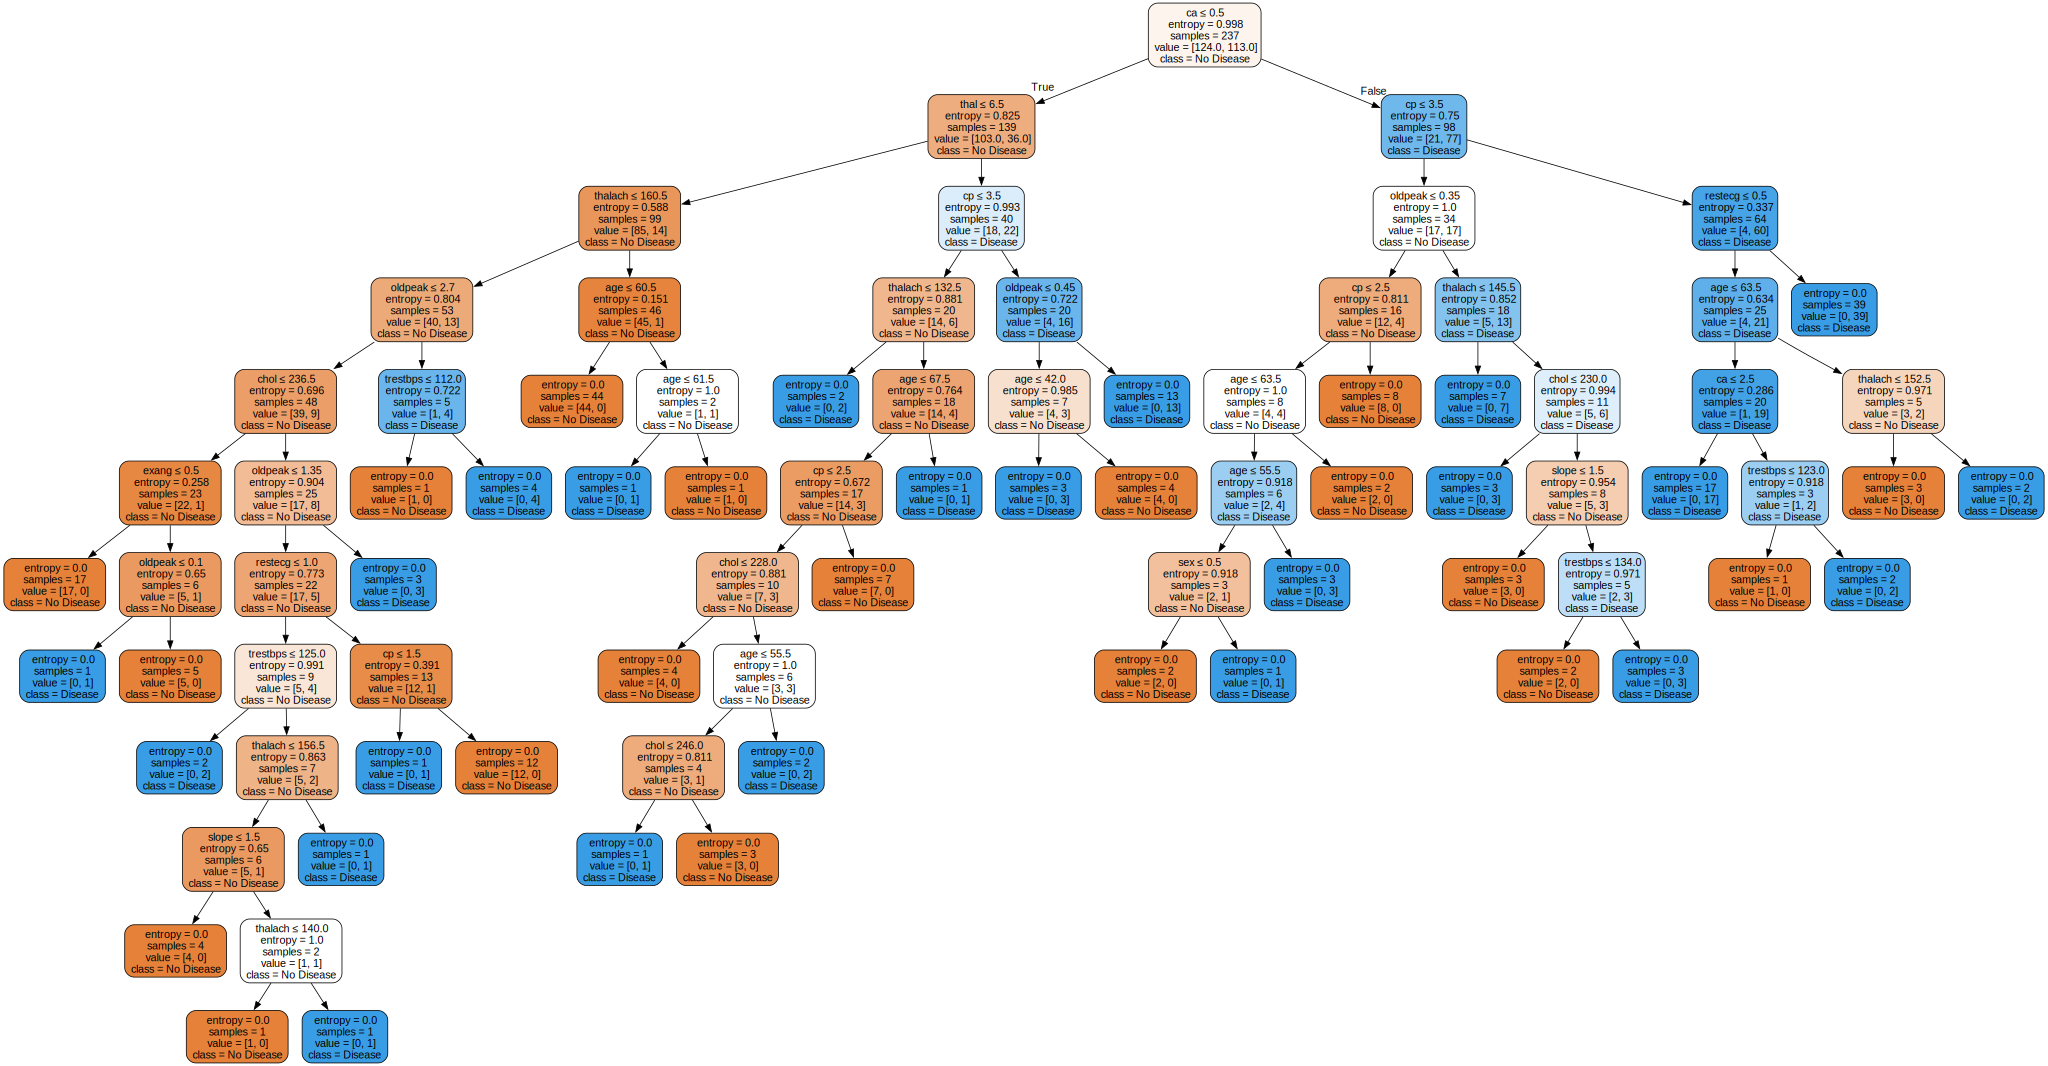

In [19]:
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=random_state)
dt_entropy.fit(X_train, y_train)
print(dt_entropy.score(X_train, y_train))
evaluate(dt_entropy, "Information Gain", X_test, y_test)
tree_summary(dt_entropy, "dt_entropy")
visualizeModel(dt_entropy, "dt_entropy")

# 5. Hyperparameter Tuning 

## hyperparameter tuning 

In [20]:
param_grid = {"max_depth": [2, 3, 4, 5, 6, None], "min_samples_split": [2, 5, 10, 15]}

### Gini

In [21]:
grid_search_gini = GridSearchCV(DecisionTreeClassifier(criterion='gini', random_state=random_state),
    param_grid=param_grid,
    scoring='balanced_accuracy',
    cv=5)
grid_search_gini.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='balanced_accuracy')

Best parameters for criterion='gini':
{'max_depth': 3, 'min_samples_split': 2}
Model: Gini Index (GridSearchCV)
Train Accuracy: 0.8523
Test Accuracy: 0.7833
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        36
           1       0.70      0.79      0.75        24

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60

------------------------------------------------------------

=== Decision Tree Summary ===
Max Depth: 3
Total Nodes: 15
Number of Leaf Nodes: 8
Importance Feature: ca
Number of features used: 5
Features used: Index(['cp', 'trestbps', 'oldpeak', 'ca', 'thal'], dtype='object')


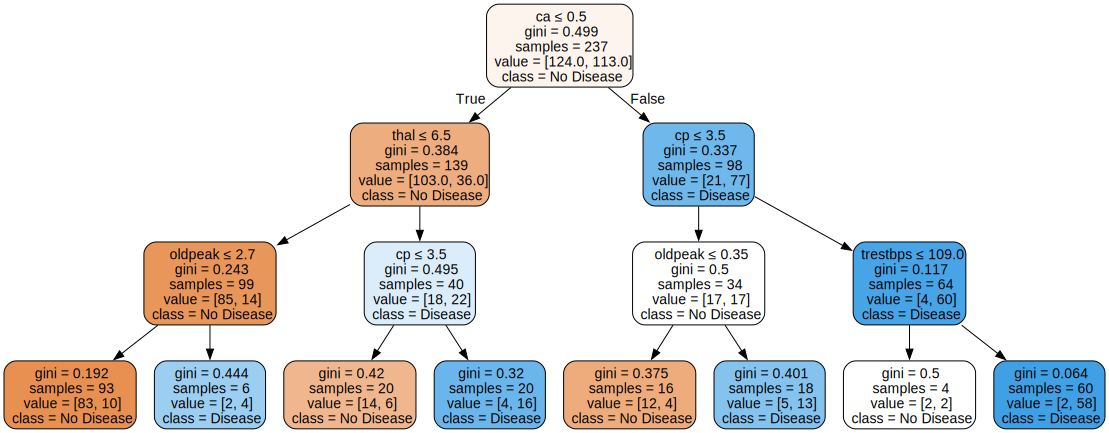

In [22]:
print("Best parameters for criterion='gini':")
print(grid_search_gini.best_params_)

# Evaluate the best model on test set

evaluate(grid_search_gini.best_estimator_, "Gini Index (GridSearchCV)", X_test, y_test)
tree_summary(grid_search_gini.best_estimator_, "dt_gini_search")
visualizeModel(grid_search_gini.best_estimator_, "dt_gini_search")

### Entropy

In [23]:
grid_search_entropy = GridSearchCV(DecisionTreeClassifier(criterion='entropy', random_state=random_state),
    param_grid=param_grid,
    scoring='balanced_accuracy',
    cv=5)
grid_search_entropy.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='balanced_accuracy')

Best parameters for criterion='entropy':
{'max_depth': 5, 'min_samples_split': 2}
Model: Information Gain (GridSearchCV)
Train Accuracy: 0.9241
Test Accuracy: 0.7667
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        36
           1       0.69      0.75      0.72        24

    accuracy                           0.77        60
   macro avg       0.76      0.76      0.76        60
weighted avg       0.77      0.77      0.77        60

------------------------------------------------------------

=== Decision Tree Summary ===
Max Depth: 5
Total Nodes: 47
Number of Leaf Nodes: 24
Importance Feature: ca
Number of features used: 9
Features used: Index(['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'ca',
       'thal'],
      dtype='object')


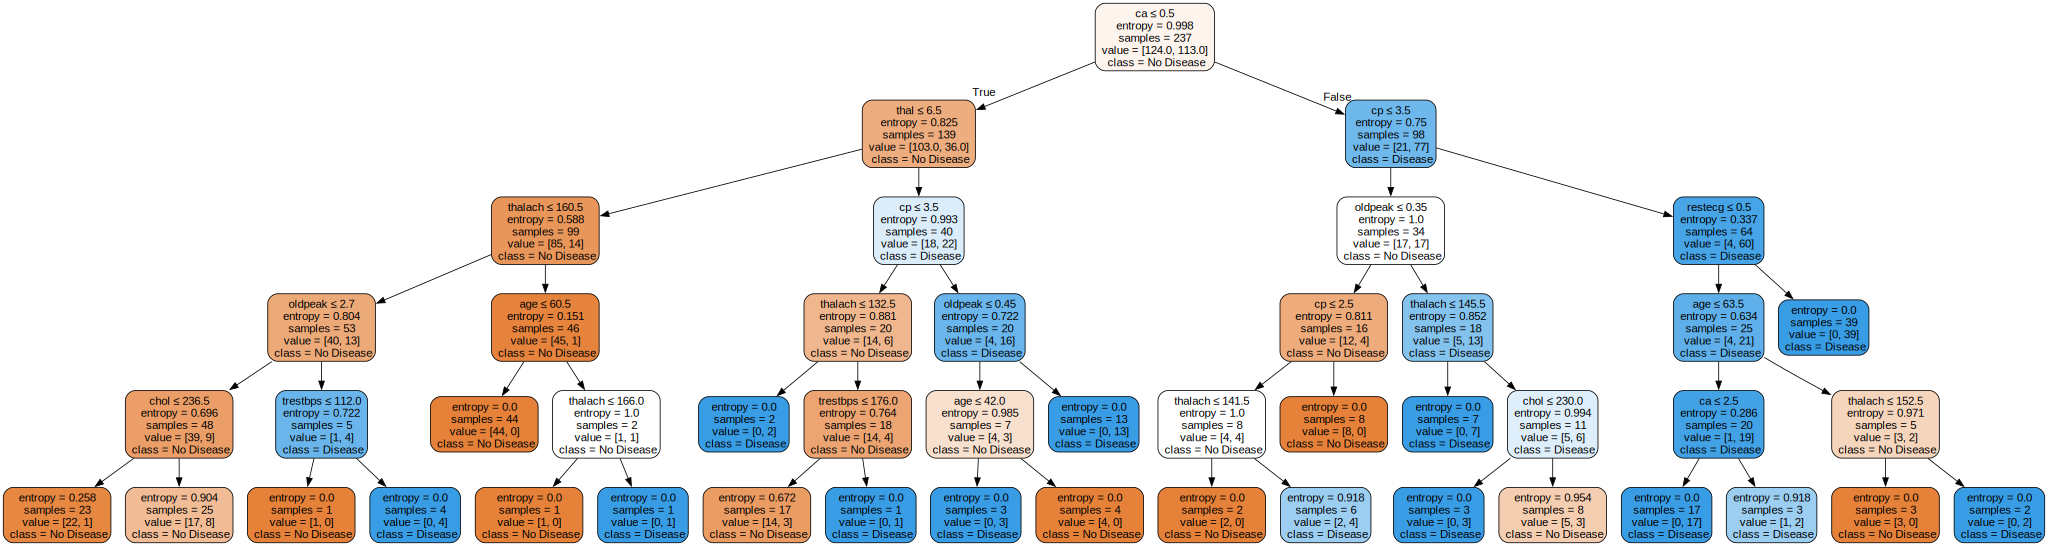

In [24]:
print("Best parameters for criterion='entropy':")
print(grid_search_entropy.best_params_)

evaluate(grid_search_entropy.best_estimator_, "Information Gain (GridSearchCV)", X_test, y_test)
tree_summary(grid_search_entropy.best_estimator_, "dt_entropy_search")
visualizeModel(grid_search_entropy.best_estimator_, "dt_entropy_search")

## Post-Pruning

In [25]:
def post_pruning(model, criterion, random_state):
    path = model.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas = path.ccp_alphas
    cv_scores = []
    for ccp_alpha in ccp_alphas:
        clf = DecisionTreeClassifier(criterion=criterion, ccp_alpha=ccp_alpha, random_state=random_state)
        scores = cross_val_score(clf, X_train, y_train, cv=5)
        cv_scores.append(np.mean(scores))

    best_alpha_index = np.argmax(cv_scores)
    best_ccp_alpha = ccp_alphas[best_alpha_index]

    best_pruned_model = DecisionTreeClassifier(criterion=criterion, ccp_alpha=best_ccp_alpha, random_state=random_state)
    best_pruned_model.fit(X_train, y_train)

    return {
        "model": best_pruned_model,
        "best_alpha": best_ccp_alpha,
        "cv_scores": cv_scores,
        "ccp_alphas": ccp_alphas
    }


### Gini Index Criterion

Best ccp_alpha: 0.013502109704641347
Model: Gini Index (Pruned)
Train Accuracy: 0.8523
Test Accuracy: 0.8000
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        36
           1       0.71      0.83      0.77        24

    accuracy                           0.80        60
   macro avg       0.79      0.81      0.80        60
weighted avg       0.81      0.80      0.80        60

------------------------------------------------------------

=== Decision Tree Summary ===
Max Depth: 3
Total Nodes: 13
Number of Leaf Nodes: 7
Importance Feature: ca
Number of features used: 4
Features used: Index(['oldpeak', 'cp', 'ca', 'thal'], dtype='object')


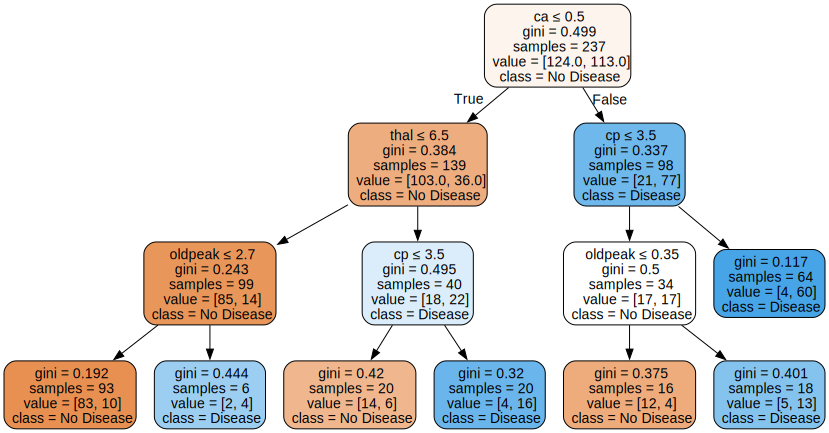

In [26]:
gini_post_pruning = post_pruning(dt_gini, "gini", random_state)
print("Best ccp_alpha:", gini_post_pruning["best_alpha"])
evaluate(gini_post_pruning["model"], "Gini Index (Pruned)", X_test, y_test)
tree_summary(gini_post_pruning["model"], "dt_gini_pruned")
visualizeModel(gini_post_pruning["model"], "dt_gini_pruned")

### Information Gain Criterion

Best ccp_alpha: 0.03182263690087546
Model: Information Gain (Pruned)
Train Accuracy: 0.8101
Test Accuracy: 0.8667
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        36
           1       0.90      0.75      0.82        24

    accuracy                           0.87        60
   macro avg       0.88      0.85      0.86        60
weighted avg       0.87      0.87      0.86        60

------------------------------------------------------------

=== Decision Tree Summary ===
Max Depth: 3
Total Nodes: 11
Number of Leaf Nodes: 6
Importance Feature: ca
Number of features used: 4
Features used: Index(['cp', 'ca', 'thal', 'thalach'], dtype='object')


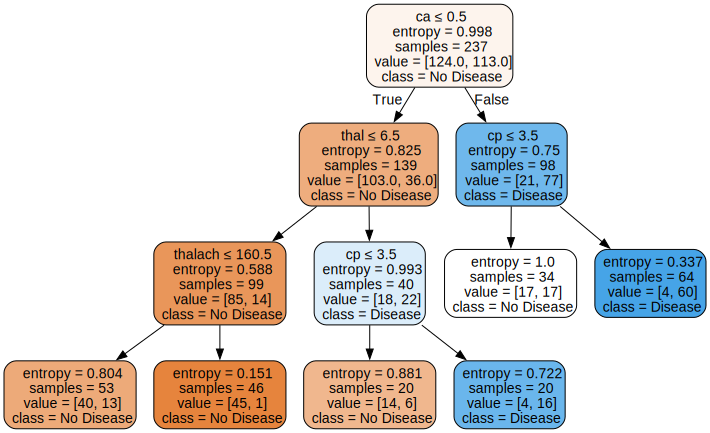

In [27]:
entropy_post_pruning = post_pruning(dt_entropy, "entropy", random_state)
print("Best ccp_alpha:", entropy_post_pruning["best_alpha"])
evaluate(entropy_post_pruning["model"], "Information Gain (Pruned)", X_test, y_test)
tree_summary(entropy_post_pruning["model"], "dt_entropy_pruned")
visualizeModel(entropy_post_pruning["model"], "dt_entropy_pruned")

# 6. Random Forest

In [28]:
rf_model_summary = {}
def rf_summary(model, model_name):
# --- 1. Feature Importances ---
    importances = model.feature_importances_
    most_important_index = np.argmax(importances)
    most_important_feature = X.columns[most_important_index]

    # --- 2. Count used features ---
    used_features = [i for i, val in enumerate(importances) if val > 0]
    used_feature_names = X.columns[used_features]
    num_used_features = len(used_features)

    # --- 3. Tree stats (depth, nodes) ---
    depths = [estimator.tree_.max_depth for estimator in model.estimators_]
    nodes = [estimator.tree_.node_count for estimator in model.estimators_]
    leaf_counts = [sum(estimator.tree_.children_left == -1) for estimator in model.estimators_]
    avg_samples = [np.mean(estimator.tree_.n_node_samples) for estimator in model.estimators_]

# --- 4. Summary dictionary ---
    summary_rf = {
        "Number of Trees": len(model.estimators_),
        "Average Max Depth": np.mean(depths),
        "Average Total Nodes": np.mean(nodes),
        "Average Leaf Nodes": np.mean(leaf_counts),
        "Importance Feature": most_important_feature,
        "Number of features used": num_used_features,
        "Features used": list(used_feature_names),
        "Average Samples per Node (avg tree)": round(np.mean(avg_samples), 2)
    }
    rf_model_summary[model_name] = summary_rf

    # --- 5. Print the summary ---
    print("\n=== Random Forest Summary ===")
    for key, value in summary_rf.items():
        if isinstance(value, list):
            print(f"{key}:")
            for item in value:
                print(f"  - {item}")
        else:
            print(f"{key}: {value}")


In [29]:
rf = RandomForestClassifier(random_state=random_state)

rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)

evaluate(rf, "Random Forest", X_test, y_test)

rf_summary(rf, "Random Forest")

Model: Random Forest
Train Accuracy: 1.0000
Test Accuracy: 0.8833
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60

------------------------------------------------------------

=== Random Forest Summary ===
Number of Trees: 100
Average Max Depth: 9.7
Average Total Nodes: 86.2
Average Leaf Nodes: 43.6
Importance Feature: thalach
Number of features used: 13
Features used:
  - age
  - sex
  - cp
  - trestbps
  - chol
  - fbs
  - restecg
  - thalach
  - exang
  - oldpeak
  - slope
  - ca
  - thal
Average Samples per Node (avg tree): 11.76


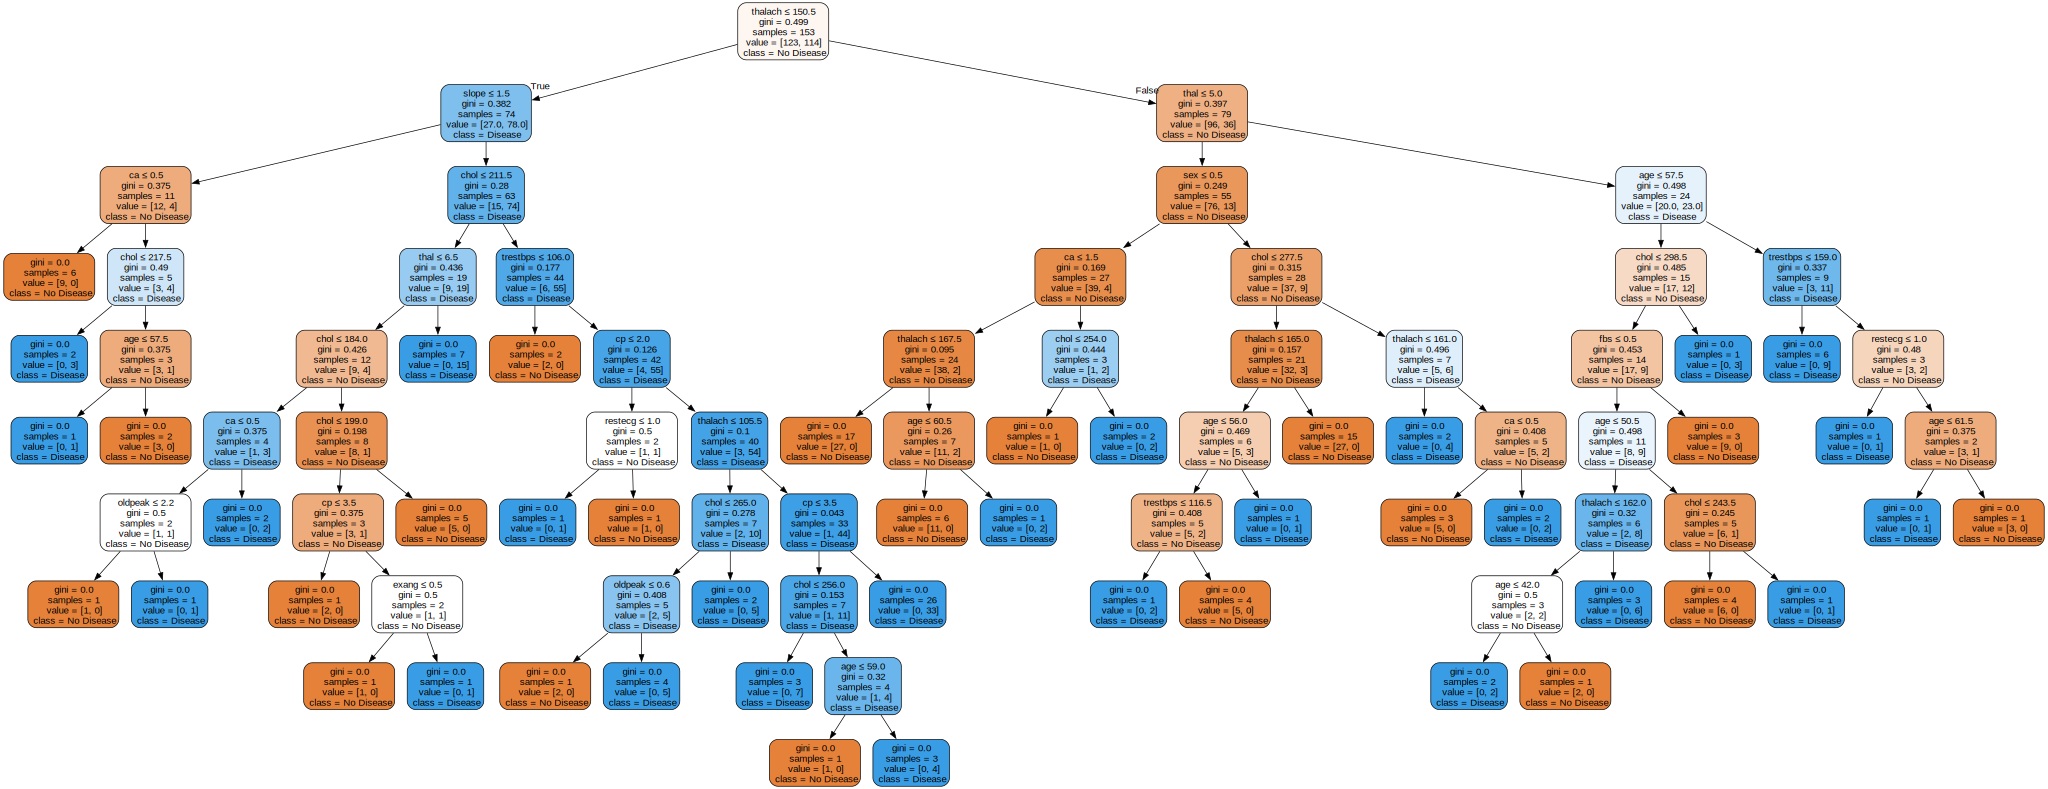

In [51]:
visualizeModel(rf.estimators_[3], "rf")

## Tuned Random Forest

In [32]:
rf_param_grid = {"max_depth": [2, 3, 4, 5, 6, None], "min_samples_split": [2, 5, 10, 15]}
rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
# Run the grid search
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy', verbose=1)

In [33]:
evaluate(rf_grid_search.best_estimator_, "Random Forest (GridSearchCV)", X_test, y_test)
rf_summary(rf_grid_search.best_estimator_, "Tuned Random Forest")

Model: Random Forest (GridSearchCV)
Train Accuracy: 0.8650
Test Accuracy: 0.8667
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89        36
           1       0.86      0.79      0.83        24

    accuracy                           0.87        60
   macro avg       0.87      0.85      0.86        60
weighted avg       0.87      0.87      0.87        60

------------------------------------------------------------

=== Random Forest Summary ===
Number of Trees: 100
Average Max Depth: 3.0
Average Total Nodes: 14.54
Average Leaf Nodes: 7.77
Importance Feature: ca
Number of features used: 13
Features used:
  - age
  - sex
  - cp
  - trestbps
  - chol
  - fbs
  - restecg
  - thalach
  - exang
  - oldpeak
  - slope
  - ca
  - thal
Average Samples per Node (avg tree): 41.31


In [34]:
print("Best parameters for random forest':")
print(rf_grid_search.best_params_)

Best parameters for random forest':
{'max_depth': 3, 'min_samples_split': 2}


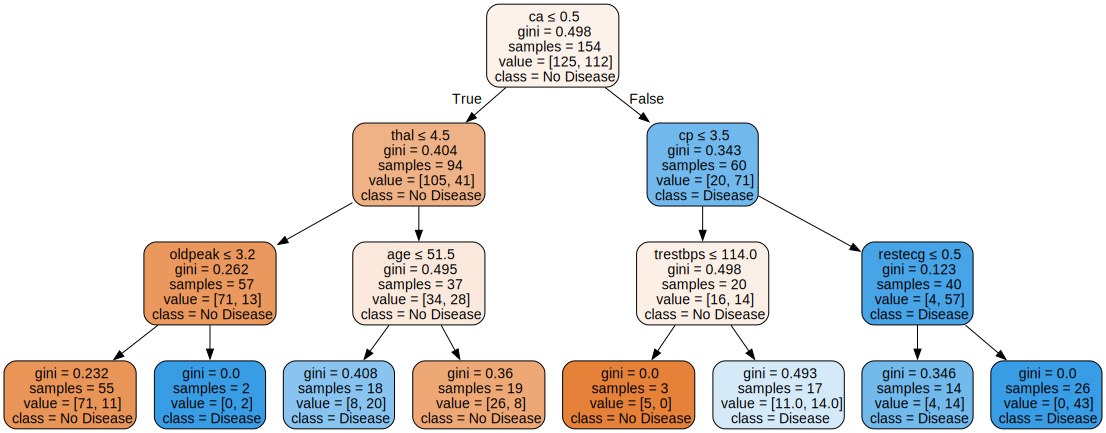

In [35]:
visualizeModel(rf_grid_search.best_estimator_[0], "rf_search")

# 7. Visualization

## Compare ROC Curves

In [36]:
def plot_roc_curve(model, X_test, y_test, label):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")

def compare_roc_curves(models_dict, X_test, y_test, title="ROC Curve Comparison"):
    plt.figure(figsize=(8, 6))

    for label, model in models_dict.items():
        plot_roc_curve(model, X_test, y_test, label)
    
    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    # plt.savefig(viz_pathname + "roc.png", dpi=300, bbox_inches='tight')
    plt.show()

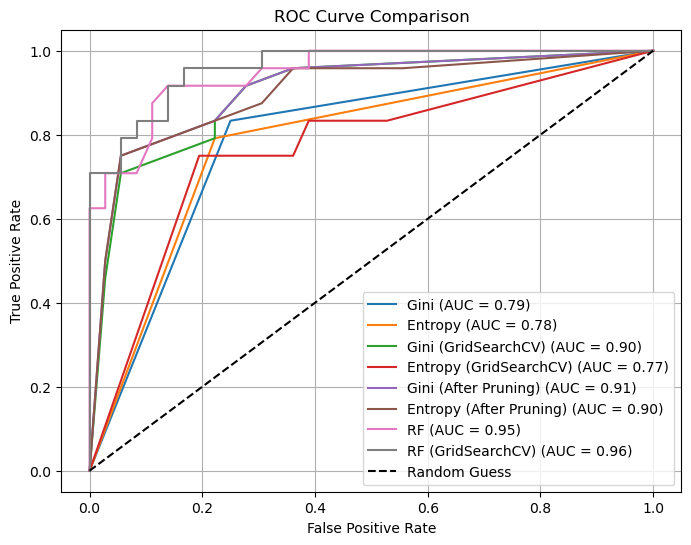

In [37]:
models = {
    "Gini": dt_gini,
    "Entropy": dt_entropy,
    "Gini (GridSearchCV)": grid_search_gini.best_estimator_,
    "Entropy (GridSearchCV)": grid_search_entropy.best_estimator_,   
    "Gini (After Pruning)": gini_post_pruning["model"],
    "Entropy (After Pruning)": entropy_post_pruning["model"],
    "RF": rf,
    "RF (GridSearchCV)": rf_grid_search.best_estimator_
}

compare_roc_curves(models, X_test, y_test)

## Feature Importance

In [38]:
def plot_feature_importance_grouped(models_dict, feature_names, sort_by_label, title):
    # sort features by importance of chosen model
    sort_model = models_dict.get(sort_by_label)
    if sort_model is None:
        raise ValueError(f"Model label '{sort_by_label}' not found in models_dict")
    
    importances_sort = sort_model.feature_importances_
    sorted_indices = np.argsort(importances_sort)[::-1]
    sorted_features = [feature_names[i] for i in sorted_indices]

    n_features = len(feature_names)
    x = np.arange(n_features)
    bar_width = 0.35
    colors = plt.cm.Set1.colors

    plt.figure(figsize=(10, 6))
    for i, (label, model) in enumerate(models_dict.items()):
        importances = model.feature_importances_[sorted_indices]
        plt.bar(x + i*bar_width - bar_width/2, importances, width=bar_width, 
                label=label, color=colors[i % len(colors)], alpha=0.8)
    
    plt.title(title)
    plt.xticks(x, sorted_features, rotation=45, ha='right')
    plt.ylabel("Feature Importance")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [39]:

def plot_feature_importance_grouped(models_dict, feature_names, sort_by_label, title):
    # Find model to sort features by
    sort_model = models_dict.get(sort_by_label)
    if sort_model is None:
        raise ValueError(f"Model label '{sort_by_label}' not found in models_dict")
    
    # Sort feature indices by importance descending for sorting model
    importances_sort = sort_model.feature_importances_
    sorted_indices = np.argsort(importances_sort)[::-1]
    sorted_features = [feature_names[i] for i in sorted_indices]

    n_features = len(feature_names)
    x = np.arange(n_features)
    bar_width = 0.35
    colors = plt.cm.Set1.colors

    plt.figure(figsize=(10, 6))
    for i, (label, model) in enumerate(models_dict.items()):
        importances = model.feature_importances_[sorted_indices]
        plt.bar(x + i*bar_width - bar_width/2, importances, width=bar_width, 
                label=label, color=colors[i % len(colors)], alpha=0.8)
    
    plt.title(title)
    plt.xticks(x, sorted_features, rotation=45, ha='right')
    plt.ylabel("Feature Importance")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


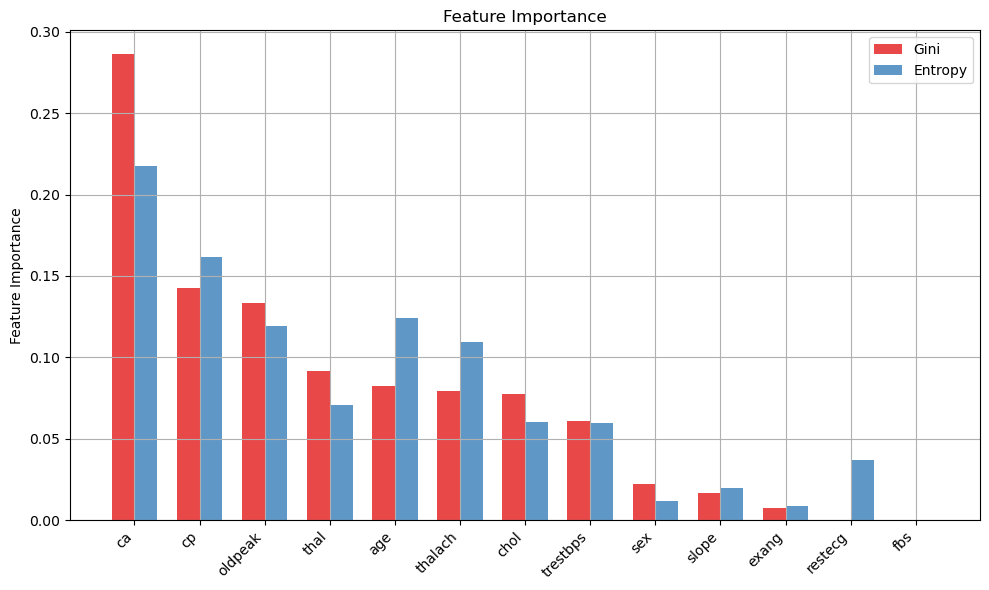

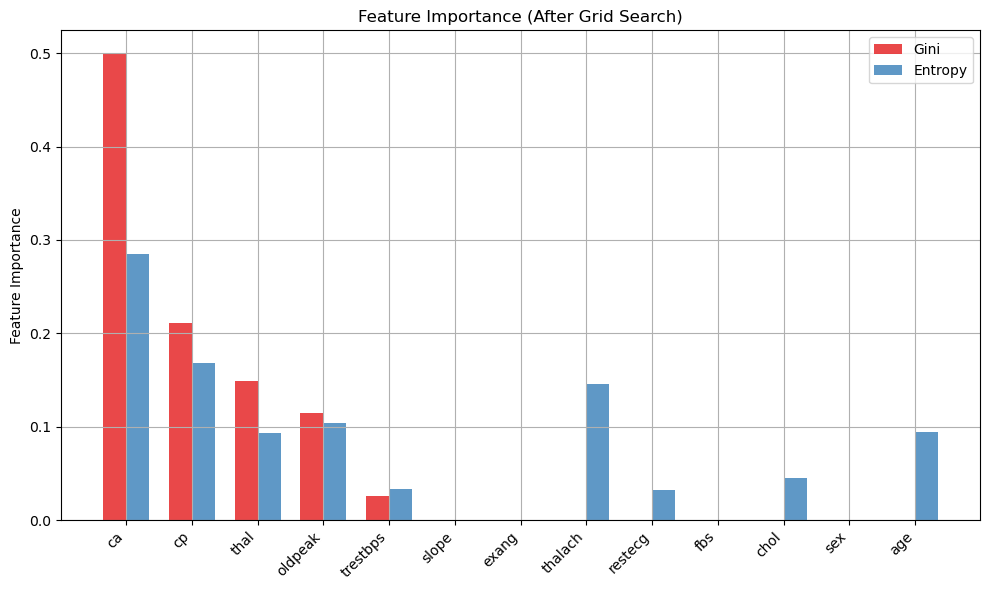

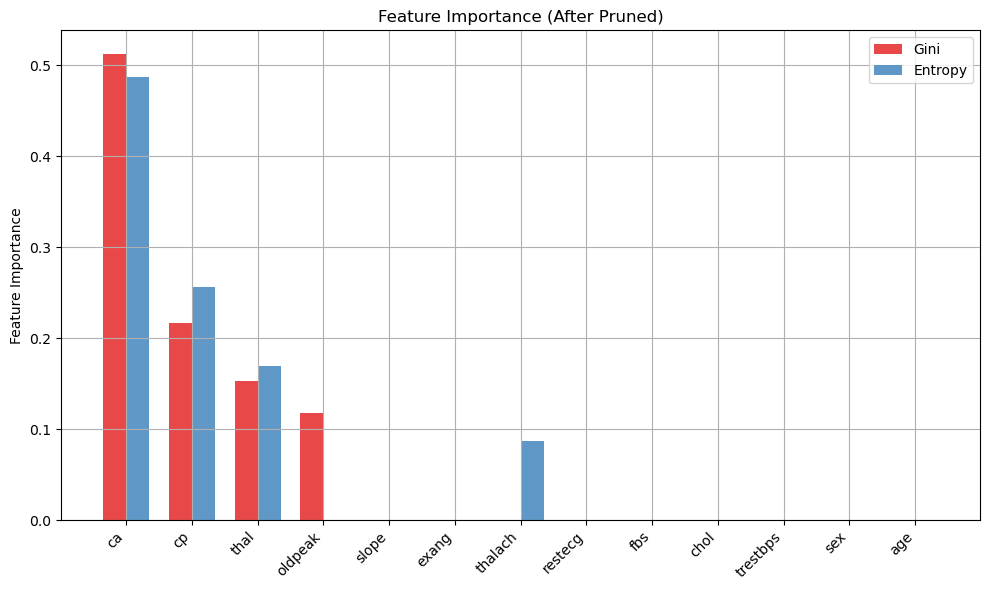

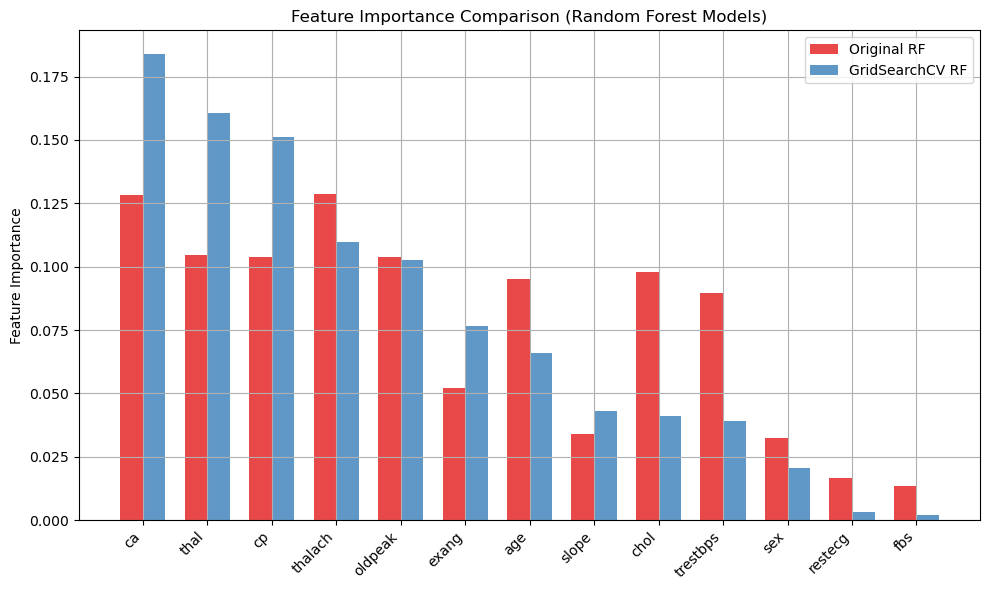

In [40]:
models_before = {
    "Gini": dt_gini,
    "Entropy": dt_entropy,
}

models_search = {
    "Gini": grid_search_gini.best_estimator_,
    "Entropy": grid_search_entropy.best_estimator_,
}

models_after = {
    "Gini": gini_post_pruning["model"],
    "Entropy": entropy_post_pruning["model"]
}

models_rf = {
    "Original RF": rf,
    "GridSearchCV RF": rf_grid_search.best_estimator_
}

feature_names = X.columns.tolist()

plot_feature_importance_grouped(models_before, feature_names, sort_by_label="Gini", 
                               title="Feature Importance")
plot_feature_importance_grouped(models_search, feature_names, sort_by_label="Gini", 
                               title="Feature Importance (After Grid Search)")
plot_feature_importance_grouped(models_after, feature_names, sort_by_label="Gini", 
                               title="Feature Importance (After Pruned)")



plot_feature_importance_grouped(models_rf, feature_names, sort_by_label="GridSearchCV RF", 
                               title="Feature Importance Comparison (Random Forest Models)")



## Performance Results

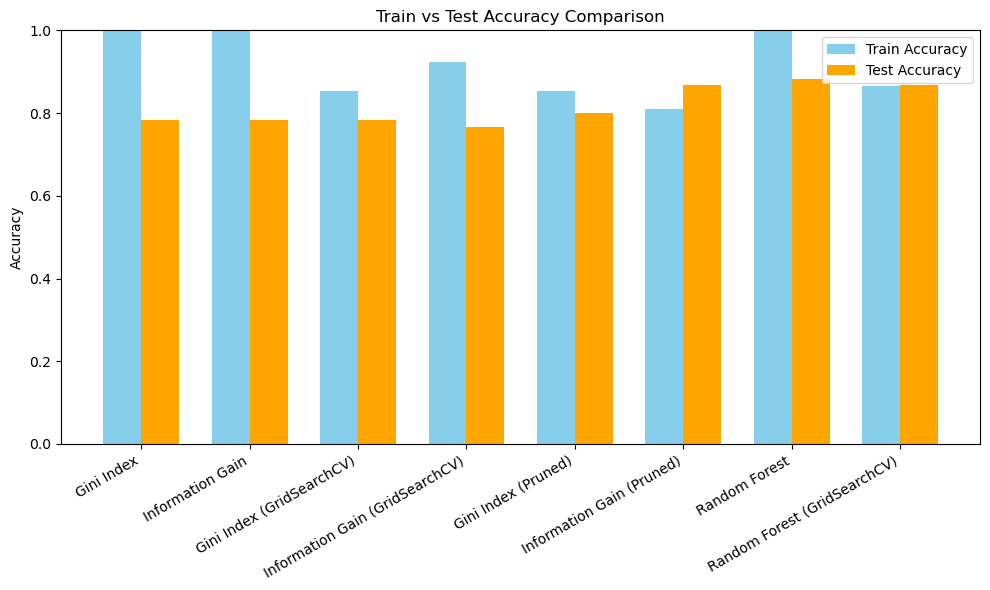

In [41]:
def plot_accuracy_comparison(performance_dict):
    model_names = list(performance_dict.keys())
    train_acc = [performance_dict[m]['train_accuracy'] for m in model_names]
    test_acc = [performance_dict[m]['test_accuracy'] for m in model_names]

    x = range(len(model_names))
    width = 0.35

    plt.figure(figsize=(10,6))
    plt.bar(x, train_acc, width=width, label='Train Accuracy', color='skyblue')
    plt.bar([i + width for i in x], test_acc, width=width, label='Test Accuracy', color='orange')

    plt.xticks([i + width/2 for i in x], model_names, rotation=30, ha='right')
    plt.ylim(0, 1)
    plt.ylabel('Accuracy')
    plt.title('Train vs Test Accuracy Comparison')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_accuracy_comparison(model_performance)


In [64]:
model_tree_df = pd.DataFrame(model_tree)
model_tree_df.T

,Max Depth,Total Nodes,Number of Leaf Nodes,Importance Feature,Number of features used,Features used
dt_gini,10,91,46,ca,11,"Index(['age', 'sex', 'cp', 'trestbps', 'chol',..."
dt_entropy,11,83,42,ca,12,"Index(['age', 'sex', 'cp', 'trestbps', 'chol',..."
dt_gini_search,3,15,8,ca,5,"Index(['cp', 'trestbps', 'oldpeak', 'ca', 'tha..."
dt_entropy_search,5,47,24,ca,9,"Index(['age', 'cp', 'trestbps', 'chol', 'reste..."
dt_gini_pruned,3,13,7,ca,4,"Index(['oldpeak', 'cp', 'ca', 'thal'], dtype='..."
dt_entropy_pruned,3,11,6,ca,4,"Index(['cp', 'ca', 'thal', 'thalach'], dtype='..."


In [61]:
rf_model_summary_df = pd.DataFrame(rf_model_summary)
rf_model_summary_df.T

,Number of Trees,Average Max Depth,Average Total Nodes,Average Leaf Nodes,Importance Feature,Number of features used,Features used,Average Samples per Node (avg tree)
Random Forest,100,9.7,86.2,43.6,thalach,13,"[age, sex, cp, trestbps, chol, fbs, restecg, t...",11.76
Tuned Random Forest,100,3.0,14.54,7.77,ca,13,"[age, sex, cp, trestbps, chol, fbs, restecg, t...",41.31


In [62]:
model_performance_df = pd.DataFrame(model_performance)
model_performance_df.T

,train_accuracy,test_accuracy,classification_report
Gini Index,1.0,0.783333,"{'0': {'precision': 0.8709677419354839, 'recal..."
Information Gain,1.0,0.783333,"{'0': {'precision': 0.8484848484848485, 'recal..."
Gini Index (GridSearchCV),0.852321,0.783333,"{'0': {'precision': 0.8484848484848485, 'recal..."
Information Gain (GridSearchCV),0.924051,0.766667,"{'0': {'precision': 0.8235294117647058, 'recal..."
Gini Index (Pruned),0.852321,0.8,"{'0': {'precision': 0.875, 'recall': 0.7777777..."
Information Gain (Pruned),0.810127,0.866667,"{'0': {'precision': 0.85, 'recall': 0.94444444..."
Random Forest,1.0,0.883333,"{'0': {'precision': 0.9142857142857143, 'recal..."
Random Forest (GridSearchCV),0.864979,0.866667,"{'0': {'precision': 0.868421052631579, 'recall..."
